## Laboration 2 by Oscar Törnquist Q5

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display, HTML
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

Fetch the data with pandas package, I chose to analyze red wine

In [133]:
# Fetch data from csv-file
data=pd.read_csv('data/winequality-red.csv', header=0, sep=';') #first row is the header
data=data.iloc[:,:]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Seperating the dependant and independant variables, quality is the only dependant variable since it is based on the others

In [134]:
X = data.loc[:,:"alcohol"] #independant variables
Y = data.quality #dependant variables

Standardrize the independant variables

In [135]:
scaler = StandardScaler().fit(X) #Initialize a StandardScaler instance and fit it to the dataset X
data_scaled = scaler.transform(X) # Apply the scaler to the data (standardize the features in X) 
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)#Convert the scaled data back into a dataframe of the same structure
data_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


## PCA
PCA is used in multivariate analysis to reduce the number of variables in a dataset while keeping the most important information. It simplifies complex data, making it easier to analyze and spot patterns, which is crucial for our analysis of this dataset. Making a new dataset with new principal components.

In [136]:
pca = PCA().fit(data_scaled) #PCA instance and fit it to the scaled data

# Create a dataframe of the eigenvectors
pca_eigen = pd.DataFrame(
    pca.components_.T,  #Transpose to get features as rows and components as columns
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11"],  #Name principal components
    index=data_scaled.columns  #original feature names as the index
)

# Compute the loadings
pca_data = pd.DataFrame()
pca_data["PC"] = pca_eigen.columns 
pca_data["Explained Variance"] = pca.explained_variance_  # Explained variance for each PC
pca_data["Explained Variance Ratio"] = pca.explained_variance_ratio_  #ratio of explained variance for each PC
pca_data.set_index('PC')  #'PC' as the index of the DataFrame

# Compute the PCA scores
pca_scores = pd.DataFrame(
    pca.transform(data_scaled),  #Transform the scaled data to get scores
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11"],  
    index=data_scaled.index  #Retain the original index for the data
)


To decide how many principal components to include when analyzing the data a 'Scree plot' can be used. This graph shows the variance of each principal component, sorted from highest to lowest. Based on the Kaiser-Guttman rule, we only retain components with an 'explained variance' above 1. Explained variance indicates how much of the total variation in the data is captured by each principal component.

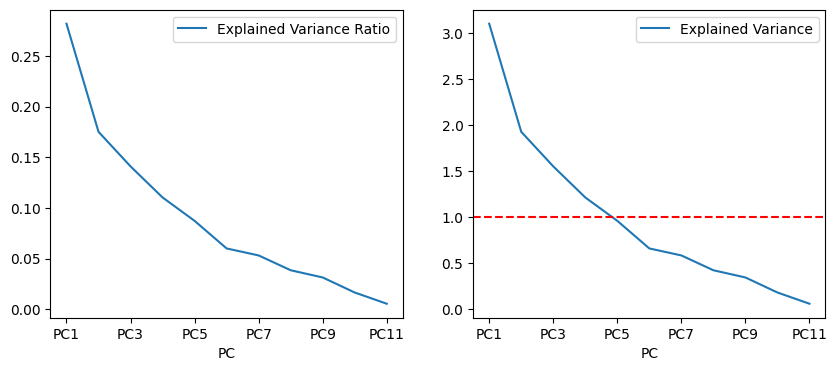

In [137]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
axs = axs.ravel()

pca_data.plot(x='PC',y='Explained Variance Ratio', ax=axs[0])
pca_data.plot(x='PC',y='Explained Variance', ax=axs[1])
plt.axhline(y=1, color='r', linestyle='--')

The most variance is in the earlier (sub 4) principal components therefore the next step of the analysis should be used with these components. Since the example we have done in the course is with two principal components I choose to do the same, it could of course be done with more, but that would be much more complicated.

<Axes: >

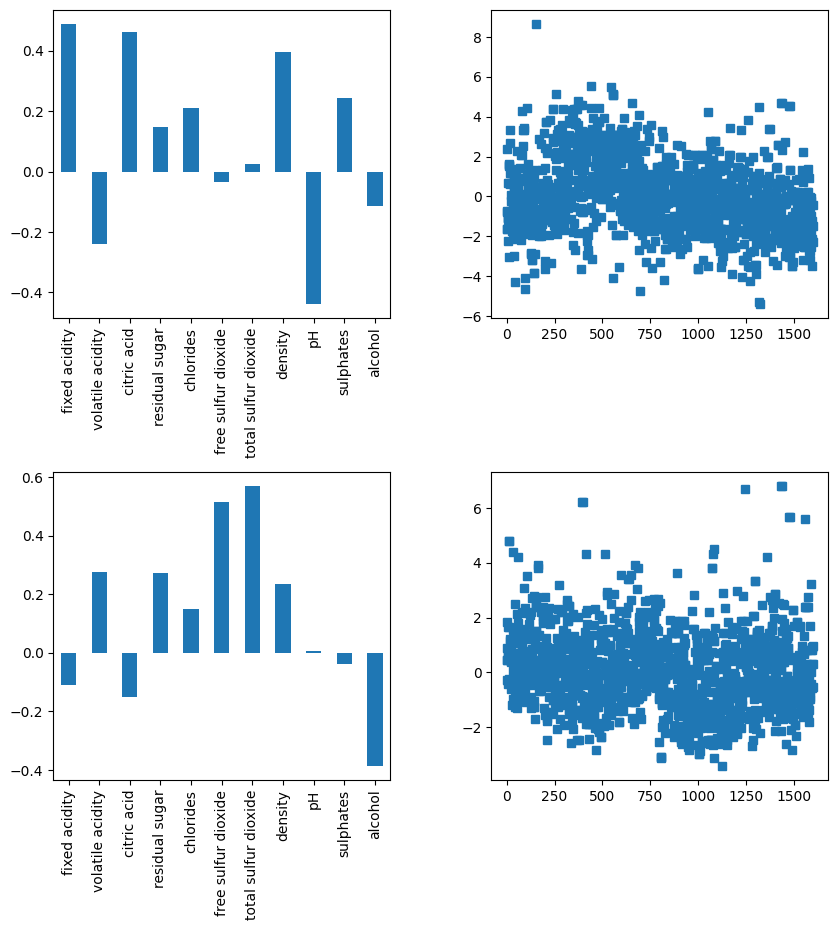

In [138]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.ravel()
pca_eigen['PC1'].plot.bar(ax=axs[0]) 
pca_scores['PC1'].plot(ax=axs[1], marker='s', linestyle='None') 

pca_eigen['PC2'].plot.bar(ax=axs[2]) 
pca_scores['PC2'].plot(ax=axs[3], marker='s', linestyle='None')

/tmp/ipykernel_1245/2767668448.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pca_eigen["PC1"][i],
/tmp/ipykernel_1245/2767668448.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pca_eigen["PC2"][i],


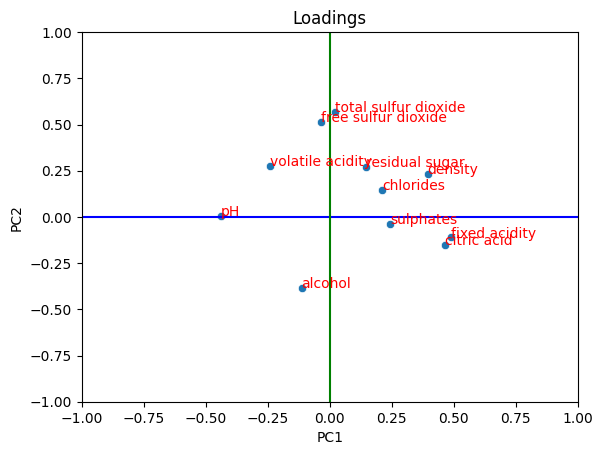

In [139]:
# Plot the loadings
sns.scatterplot(data=pca_eigen, x="PC1", y="PC2")
plt.title('Loadings')
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Plot annotations
for i in range(pca_eigen.shape[0]):
    plt.text(
        pca_eigen["PC1"][i],
        pca_eigen["PC2"][i],
        pca_eigen.index[i],
        color="red",
    )

plt.show() 

In the scatter plot pH is positioned opposite volatile acidity, fixed acidity and citric acid, which all fall near the line that belongs to PC1. Which indicates that PC1 represents the wine's pH and acidity. SImilarily, PC2 primarily reflects the alcohol content, which correlates with the amount of residual sugar, as well as the levels of free and total sulfur dioxide, following the same logic as with PC1. If we take a look at the bar plots, PC1 seem to indicate the amount of sulfates, chlorides and the density of the wine while PC2 describes alcohol content, residual sugars and sulfatedioxdes.

## LDA
Using LDA to analyze the perceived quality of the wine.

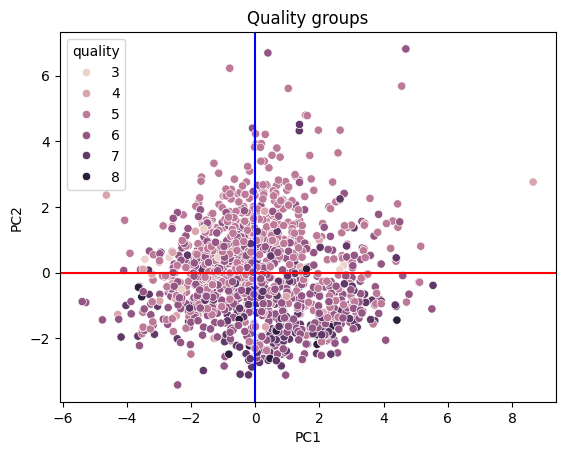

In [140]:
sns.scatterplot(data=pca_scores, x="PC1", y="PC2", hue=Y)
plt.title('Quality groups')
plt.axhline(0, color="red")
plt.axvline(0, color="blue")
plt.show()

To make the analysis a bit more understandable I add some other groups to the quality.

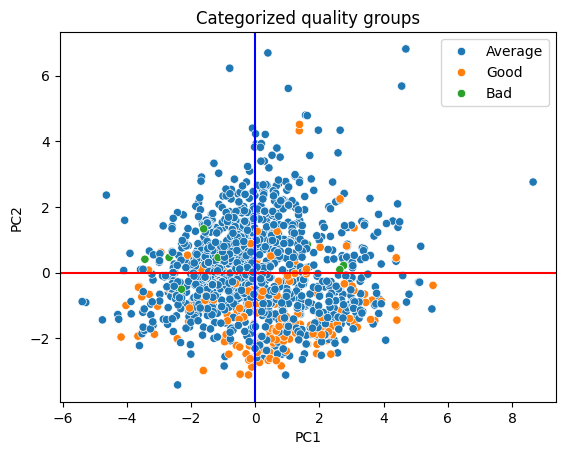

In [141]:
Y_labeled = []

for var in Y:  # Label the data according to quality
    if var > 6:
        Y_labeled.append("Good")
    elif 4 <= var <= 6:
        Y_labeled.append("Average")
    else:
        Y_labeled.append("Bad")

#plot it again in the same fashion
sns.scatterplot(data=pca_scores, x="PC1", y="PC2", hue=Y_labeled)
plt.title('Categorized quality groups')
plt.axhline(0, color="red")
plt.axvline(0, color="blue")
plt.show()

The trend here seems to be in general low values of PC2 to get a good quality wine, LDA will seperate more of the groups.

In [142]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

lda = LDA().fit(data_scaled, Y_labeled)

#loadings
pretty_scallings=pretty_scalings(lda, data_scaled, out=True)

Coefficients of linear discriminants:


,LD1,LD2
fixed acidity,0.346521,-0.943965
volatile acidity,-0.278458,-0.965498
citric acid,0.085872,-0.481089
residual sugar,0.223245,-0.320068
chlorides,-0.227213,-0.258117
free sulfur dioxide,-0.044786,-0.084172
total sulfur dioxide,-0.120106,0.479236
density,-0.423510,0.808453
pH,-0.025712,-0.707204
sulphates,0.401911,-0.094952


In [143]:
def rpredict(lda, X, y, out=False):
    ret = {"class": lda.predict(X),
           "posterior": pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)}
    ret["x"] = pd.DataFrame(lda.fit_transform(X, y))
    ret["x"].columns = ["LD"+str(i+1) for i in range(ret["x"].shape[1])]
    if out:
        print("class")
        print(ret["class"])
        print()
        print("posterior")
        print(ret["posterior"])
        print()
        print("x")
        print(ret["x"])
    return ret

lda_values=rpredict(lda, data_scaled, Y_labeled, True)

class
['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']

posterior
       Average       Bad      Good
0     0.993256  0.002399  0.004344
1     0.989617  0.001988  0.008395
2     0.988929  0.000715  0.010356
3     0.926946  0.000039  0.073015
4     0.993256  0.002399  0.004344
...        ...       ...       ...
1594  0.974987  0.000611  0.024402
1595  0.907190  0.000102  0.092708
1596  0.919233  0.000040  0.080728
1597  0.973740  0.002201  0.024059
1598  0.829695  0.000009  0.170296

[1599 rows x 3 columns]

x
           LD1       LD2
0    -1.597219 -0.286139
1    -1.199599 -0.387851
2    -1.049564 -0.019757
3     0.217746  0.622041
4    -1.597219 -0.286139
...        ...       ...
1594 -0.529050 -0.195163
1595  0.348014  0.141695
1596  0.281548  0.580171
1597 -0.568148 -0.724759
1598  0.819693  0.934309

[1599 rows x 2 columns]


The X matrix returned when running the function contains our linear discriminant functions

In [144]:
#Function to calculate the in group variance
def calcWithinGroupsVariance(variable, groupvariable):
    # Find the unique levels (groups) in the group variable
    levels = sorted(set(groupvariable))
    numlevels = len(levels)  # Number of unique groups
    
    # Initialize counters for the numerator and denominator of the variance calculation
    numtotal = 0
    denomtotal = 0
    
    # Loop through each group (level) to calculate variance within the group
    for leveli in levels:
        # Select data points corresponding to the current group
        levelidata = variable[groupvariable == leveli]
        levelilength = len(levelidata)  # Number of data points in the group
        
        # Calculate the standard deviation for the current group
        sdi = np.std(levelidata)
        
        # Numerator part: Sum of squared deviations for the group
        numi = (levelilength) * sdi**2
        
        # Denominator part: Sum of the number of elements in the group
        denomi = levelilength
        
        # Accumulate the numerator and denominator for all groups
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    
    # Calculate the within-groups variance using the formula
    Vw = numtotal / (denomtotal - numlevels)  # Subtract numlevels to account for degrees of freedom
    
    return Vw


In [145]:
#Function to calculate between group variance
def calcBetweenGroupsVariance(variable, groupvariable):
    # Find the unique levels (groups) in the group variable
    levels = sorted(set(groupvariable))
    numlevels = len(levels)  # Number of unique groups
    
    # Calculate the overall grand mean (mean of all data points)
    grandmean = np.mean(variable)
    
    # Initialize counters for the numerator and denominator of the variance calculation
    numtotal = 0
    denomtotal = 0
    
    # Loop through each group (level) to calculate the variance between groups
    for leveli in levels:
        # Select data points corresponding to the current group
        levelidata = variable[groupvariable == leveli]
        levelilength = len(levelidata)  # Number of data points in the group
        
        # Calculate the mean for the current group
        meani = np.mean(levelidata)
        
        # Numerator part: Weighted sum of squared differences between group mean and grand mean
        numi = levelilength * ((meani - grandmean) ** 2)
        
        # Denominator part: Sum of the number of elements in the group (not directly used here)
        denomi = levelilength
        
        # Accumulate the numerator and denominator for all groups
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    
    # Calculate the between-groups variance using the formula
    Vb = numtotal / (numlevels - 1)  # Adjust denominator by degrees of freedom (numlevels - 1)
    
    return Vb

In [146]:
#Calculate separation between groups

def calcSeparations(variables, groupvariable):
    # Loop through each variable in the dataset
    for variablename in variables:
        # Extract the data for the current variable
        variablei = variables[variablename]
        
        # Calculate the within-groups variance for the current variable
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        
        # Calculate the between-groups variance for the current variable
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        
        # Calculate the separation as the ratio of between-groups variance to within-groups variance
        sep = Vb / Vw
        
        # Print the results for the current variable
        print("variable", variablename, "Vw=", Vw, "Vb=", Vb, "separation=", sep)

In [147]:
calcSeparations(lda_values["x"], Y)

variable LD1 Vw= 0.8312895521251767 Vb= 158.58818847620734 separation= 190.7737058294303
variable LD2 Vw= 0.9682039164598656 Vb= 21.861916393668913 separation= 22.57986775513642


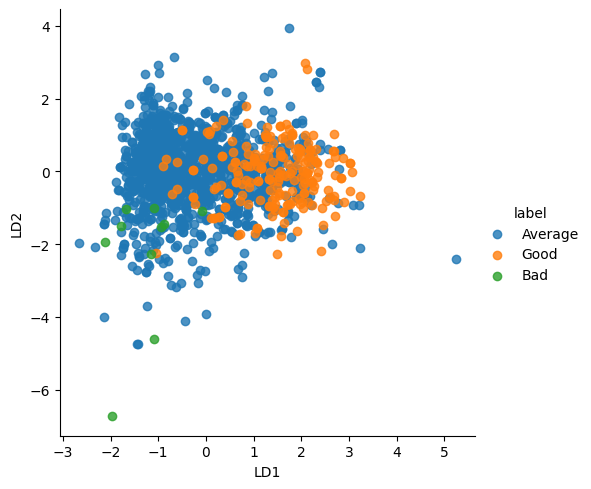

In [148]:
#Add labels as a column to use it as a hue in the graph
a=lda_values["x"].join(Y)
a['label']=Y_labeled
sns.lmplot(a,x="LD1", y="LD2", hue='label', fit_reg=False)

In [149]:
def ldahist(data, g, sep=False):
    xmin = np.trunc(np.min(data)) - 1
    xmax = np.trunc(np.max(data)) + 1
    ncol = len(set(g))
    binwidth = 0.5
    bins=np.arange(xmin, xmax + binwidth, binwidth)
    if sep:
        fig, axl = plt.subplots(ncol, 1, sharey=True, sharex=True)
    else:
        fig, axl = plt.subplots(1, 1, sharey=True, sharex=True)
        axl = [axl]*ncol
    for ax, (group, gdata) in zip(axl, data.groupby(g)):
        sns.histplot(gdata.values, bins=10, ax=ax, label=str(group),stat="density", kde=True,kde_kws=dict(cut=1),alpha=.4, edgecolor=(1, 1, 1, .4))
        ax.set_xlim([xmin, xmax])
        if sep:
            ax.set_xlabel(str(group))
        else:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

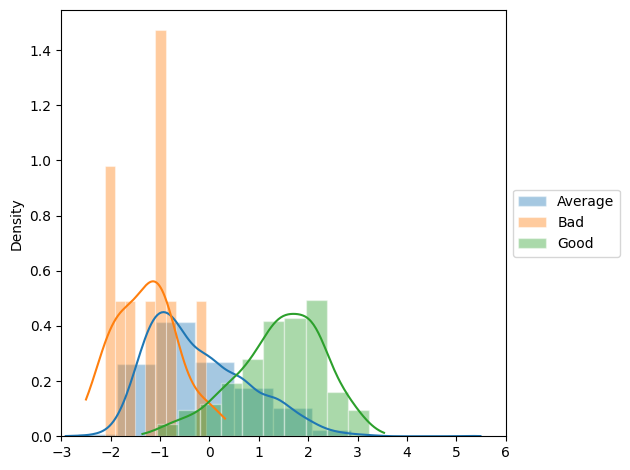

In [150]:
ldahist(lda_values["x"].LD1, Y_labeled)

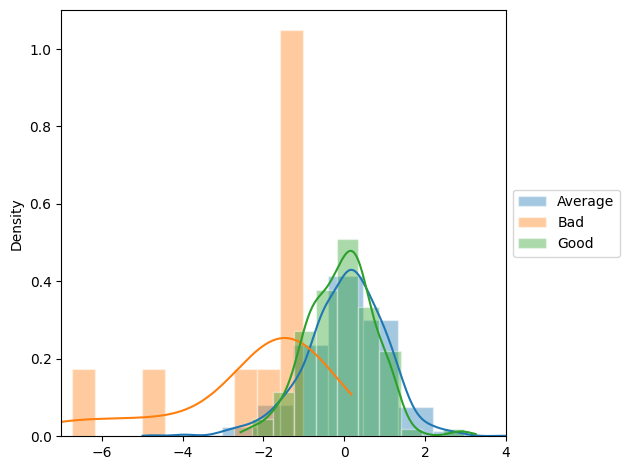

In [151]:
ldahist(lda_values["x"].LD2, Y_labeled)

The separation between the groups in the scatter plot is not very good, partly due to having three distinct groups. By reducing the number of groups to two, the separation may become more pronounced. Therefore, I will reduce the grouping so that wines with a quality of 6 or below are considered 'bad,' while those above 6 are 'good' with no middle category. Although this approach is not ideal, it is necessary to draw some conclusions in this case. This adjustment may also improve the histograms, as the current fitting struggles with the three-group division

In [152]:
Y_labeled = []

for var in Y:
    if var < 6:
        Y_labeled.append(("bad"))
    else:
        Y_labeled.append(("good"))

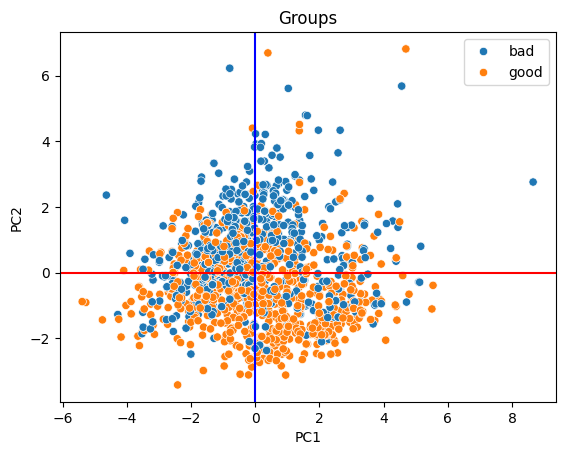

In [153]:
sns.scatterplot(data=pca_scores, x="PC1", y="PC2", hue=Y_labeled)
plt.title('Groups')
plt.axhline(0, color="red")
plt.axvline(0, color="blue")
plt.show()

In [154]:
lda = LDA().fit(data_scaled, Y_labeled)
lda_values=rpredict(lda, data_scaled, Y_labeled, True)

class
['bad' 'bad' 'bad' ... 'good' 'good' 'good']

posterior
           bad      good
0     0.797191  0.202809
1     0.791692  0.208308
2     0.753741  0.246259
3     0.472180  0.527820
4     0.797191  0.202809
...        ...       ...
1594  0.456456  0.543544
1595  0.173346  0.826654
1596  0.197062  0.802938
1597  0.485049  0.514951
1598  0.234384  0.765616

[1599 rows x 2 columns]

x
           LD1
0    -1.204535
1    -1.178639
2    -1.012185
3    -0.066415
4    -1.204535
...        ...
1594 -0.017804
1595  1.049005
1596  0.928030
1597 -0.106069
1598  0.758079

[1599 rows x 1 columns]


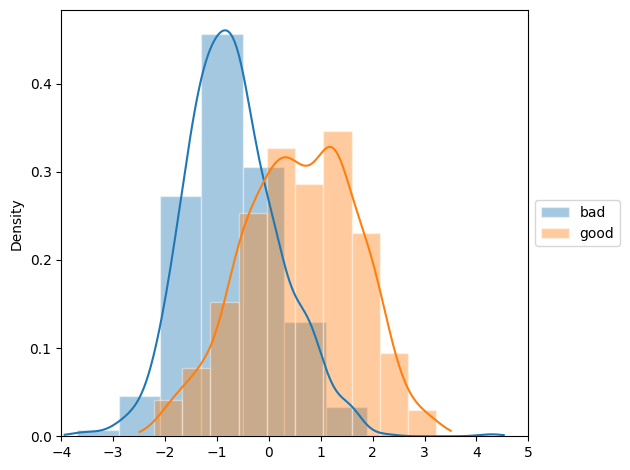

In [155]:
ldahist(lda_values["x"].LD1, Y_labeled)

With the reduction of groupings a clearer separation between the groups can be observed. According to the Kaiser-Guttman criterion, the first four principal components should have been included in the analysis. However, due to the complexity of this task both with calculations and visualization of the results opted out of doing it that way. The findings from this analysis suggests that the main differentiating factors 'good' and 'bad' wines are alcohol content and residual sugar, likely linked to how effectively the yeast performs during fermentation. This conclusion is drawn from the clustering of red wines around PC2, which primarily captures the influence of alcohol and residual sugar levels.